In [1]:
!pip install pystan==2.19.1.1

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 67.3 MB 46 kB/s s eta 0:00:01��█████▋               | 34.8 MB 39.3 MB/s eta 0:00:01


In [2]:
!pip install prophet

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 65 kB 3.9 MB/s eta 0:00:011
     |████████████████████████████████| 49 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 50.4 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.

    Running setup.py install for prophet ... done
  DEPRECATION: prophet was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('./prophet/examples/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [5]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.213670    7.509129    8.923955
3266 2017-01-16  8.538673    7.757836    9.264203
3267 2017-01-17  8.326104    7.572265    9.022222
3268 2017-01-18  8.158756    7.399401    8.859099
3269 2017-01-19  8.170689    7.424570    8.868845

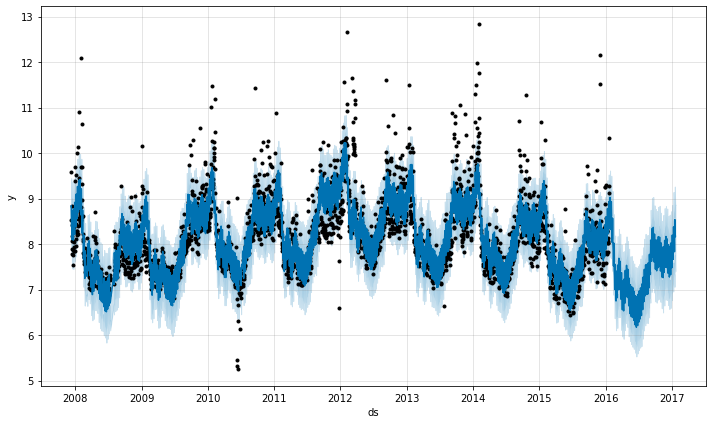

In [8]:
fig1 = m.plot(forecast)

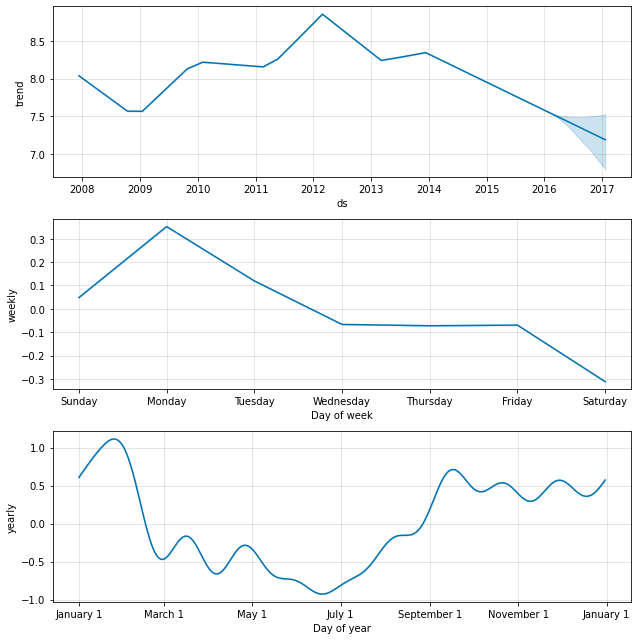

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

In [11]:
plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)

<AxesSubplot:>

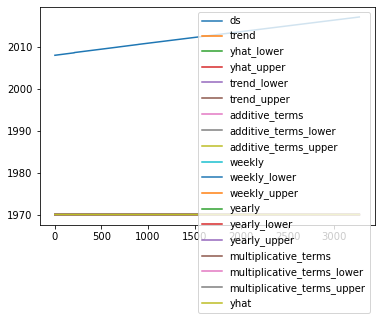

In [13]:
import matplotlib.pyplot as plt
forecast.plot()

<AxesSubplot:>

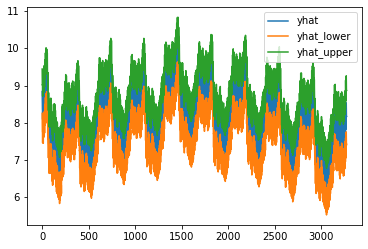

In [15]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].plot()

<AxesSubplot:xlabel='ds'>

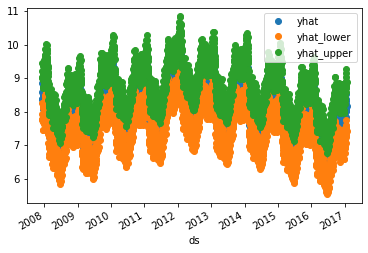

In [18]:
forecast.plot(x='ds', y=['yhat', 'yhat_lower','yhat_upper'] , style='o')

In [19]:
print (type(future))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print (type(forecast))

<class 'pandas.core.frame.DataFrame'>


In [22]:
len(df)

2905

In [23]:
len(forecast)

3270

In [24]:
df.columns

Index(['ds', 'y'], dtype='object')

In [25]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [31]:
o = pd.merge_asof(df, forecast, on="ds")

MergeError: Incompatible merge dtype, dtype('<M8[ns]') and dtype('O'), both sides must have numeric dtype

In [34]:
df.dtypes

ds     object
y     float64
dtype: object

In [35]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [37]:
from pandas import to_datetime
df["ds"] = to_datetime(df["ds"])

In [38]:
o = pd.merge_asof(df, forecast, on="ds")